In [1]:
import pandas as pd
data=pd.read_excel(r"C:\Users\ADITHYA S\Desktop\Akira_Projects\YEARLY_2023_2024 CAAQMS_FINAL_UPLOAD.xlsx")
data


,DATE,PM10,PM25,SO2,CO,NO,NO2,NOX,NH3,O3,AQI
0,2023-01-01,100.00,32.00,2.00,0.00,12.00,16.00,26.00,9.00,61.00,100
1,2023-02-01,92.00,39.00,1.00,1.00,12.00,16.00,26.00,9.00,62.00,92
2,2023-03-01,96.00,37.00,2.00,0.00,12.00,16.00,26.00,9.00,62.00,96
3,2023-04-01,116.00,28.00,3.00,1.00,12.00,16.00,26.00,9.00,61.00,111
4,2023-05-01,105.00,32.00,5.00,0.00,12.00,17.00,26.00,9.00,61.00,104
...,...,...,...,...,...,...,...,...,...,...,...
716,2024-12-27,45.76,24.57,0.96,0.71,4.91,6.98,11.79,0.51,30.36,46
717,2024-12-28,47.60,27.11,1.26,0.87,6.52,8.50,14.60,0.81,30.37,48
718,2024-12-29,49.21,29.13,1.05,1.05,8.08,9.70,17.39,1.05,30.34,53
719,2024-12-30,45.38,26.49,1.13,1.49,5.80,8.32,13.46,0.88,30.37,75


In [2]:
data.isnull().sum()

DATE    0
PM10    0
PM25    0
SO2     0
CO      0
NO      0
NO2     0
NOX     0
NH3     0
O3      0
AQI     0
dtype: int64

In [3]:
data.duplicated().sum()

np.int64(0)

In [4]:
x = data[['PM10','PM25','SO2','CO','NO','NO2','NOX','NH3','O3']]
y = data['AQI']
y

0      100
1       92
2       96
3      111
4      104
      ... 
716     46
717     48
718     53
719     75
720     82
Name: AQI, Length: 721, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train
y

0      100
1       92
2       96
3      111
4      104
      ... 
716     46
717     48
718     53
719     75
720     82
Name: AQI, Length: 721, dtype: int64

In [6]:
from sklearn.linear_model import LinearRegression
li = LinearRegression()
li.fit(x_train,y_train)

LinearRegression()

In [7]:
pre=li.predict(x_test)
pre

array([ 76.9288074 ,  54.82758875,  59.79763804,  62.86148626,
       125.40592651, 119.40588352,  76.53357796,  62.13303823,
        62.13306272,  77.10338364,  61.1613693 ,  61.86030309,
        49.99560762,  61.50903699,  62.37893487,  62.80903643,
        49.3391098 ,  65.92481072,  62.63867645, 107.99024492,
        62.75408451, 145.16768511,  45.02724298,  62.71045821,
        55.77256257,  58.88315051, 124.94300603,  60.73656366,
        62.51524693,  62.54001308,  88.72483716, 127.57121918,
        89.37414923,  58.74502627,  48.40129128,  24.95047659,
        61.01540625,  60.66409322,  61.27587819,  62.74037936,
        48.41486895,  46.94634062,  81.39485765, 142.29243913,
        68.93893607,  99.03108524,  60.65187696,  65.93465871,
        48.08318557,  62.55401479,  53.43821604,  46.81297584,
        60.86107446,  48.47275167,  33.09752973,  61.85507637,
        61.68981483,  61.68475945, 132.43162296,  48.52580764,
        62.20830598,  48.6436265 ,  19.58995244,  62.46

In [8]:

import pickle
f=open('li.pkl', 'wb')
pickle.dump(li, f)
f.close()

In [9]:
f=open('li.pkl','rb')
li=pickle.load(f)
f.close()

In [10]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [11]:
data=dt_regressor.predict(x_test)
data


array([ 64.        ,  55.        ,  55.        ,  64.        ,
       123.        , 117.        ,  77.        ,  59.        ,
        65.        ,  75.        ,  58.        ,  64.        ,
        48.        ,  58.        ,  65.        ,  65.        ,
        48.        ,  67.        ,  65.        , 101.33333333,
        65.        , 164.        ,  43.        ,  64.        ,
        43.        ,  58.        , 124.        ,  58.        ,
        65.        ,  64.        ,  83.        , 123.        ,
        91.        ,  58.        ,  48.        ,  38.        ,
        58.        ,  59.        ,  59.        ,  65.        ,
        48.        ,  46.        ,  66.        , 134.        ,
        55.        , 103.        ,  58.        ,  52.        ,
        45.        ,  65.        ,  56.        ,  46.        ,
        53.        ,  48.        ,  32.        ,  64.        ,
        64.        ,  59.        , 150.        ,  48.        ,
        64.        ,  48.        , 111.        ,   4.  

In [12]:

from sklearn.metrics import r2_score
y_pred = li.predict(x_test)
r2_score(y_test, y_pred)

0.8383413665728262

In [13]:
from sklearn.metrics import mean_squared_error
print("MSE", mean_squared_error(y_test, y_pred))

MSE 102.41563824615866


In [14]:
import numpy as np
print("RME",np.sqrt(mean_squared_error(y_test, y_pred)))

RME 10.120061177984976


In [15]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
pre=rf_regressor.predict(x_test)
pre

array([ 66.35      ,  55.06      ,  57.65      ,  64.05      ,
       123.43      , 117.61      ,  76.96      ,  59.        ,
        64.2       ,  76.11      ,  59.92      ,  63.82      ,
        47.62      ,  58.        ,  65.        ,  65.        ,
        48.01      ,  67.        ,  64.33      , 101.30952381,
        65.18      , 153.68      ,  43.03      ,  64.32      ,
        45.49      ,  58.        , 123.41      ,  58.        ,
        65.12      ,  64.05      ,  82.45      , 122.5       ,
        90.72      ,  58.        ,  48.        ,  38.12      ,
        58.        ,  59.02666667,  59.        ,  65.11      ,
        47.98      ,  45.59      ,  68.        , 138.19      ,
        56.        , 102.22      ,  58.        ,  70.59      ,
        45.16      ,  65.        ,  56.23      ,  46.91      ,
        62.05      ,  48.        ,  34.09      ,  63.99      ,
        64.        ,  59.05      , 150.25      ,  48.        ,
        64.        ,  48.        , 109.21      ,  21.71

In [17]:
from sklearn.metrics import r2_score
y_pred = li.predict(x_test)
r2_score(y_test, y_pred)

0.8383413665728262

In [18]:
from sklearn.metrics import mean_squared_error
print("MSE", mean_squared_error(y_test, y_pred))

MSE 102.41563824615866


In [19]:
import numpy as np
print("RME",np.sqrt(mean_squared_error(y_test, y_pred)))

RME 10.120061177984976


In [20]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(x_train, y_train)

KNeighborsRegressor()

In [21]:
pre=knn_regressor.predict(x_test)
pre


array([ 62.6,  55.4,  64.6,  64.4, 122.6, 122.6,  77.4,  59. ,  64.2,
        75.6,  66.6,  64. ,  49. ,  58. ,  64.8,  65. ,  47.6,  67.6,
        64.6, 100.8,  64.8, 148. ,  43.4,  64.2,  56.8,  57.6, 122.6,
        58. ,  64.6,  64.2,  82.2, 119.2,  89.2,  58.4,  48. ,  38.4,
        58. ,  58.6,  59. ,  64.8,  48. ,  46. ,  68.4, 139.2,  55.6,
       105.8,  58. ,  53.2,  44.6,  64.8,  55.4,  48.2,  64.6,  48. ,
        33.4,  64. ,  64. ,  58.6, 150.8,  48.2,  64.6,  48.2,  87. ,
        52.2,  59.4,  46.8, 122.6,  40.8,  55.4,  58.4,  65. ,  57.2,
        48.2,  68.2,  48.8,  48.2,  58.2,  42.4,  58. ,  47.8,  53.8,
        58. ,  90.8,  58.6,  58. ,  58.4,  64. ,  58. ,  57.8, 122.6,
        48.6,  38.4,  55.4,  51.6,  49.4,  33.8, 137.8,  48.2,  58. ,
        58.6,  42.4,  47.2,  64. , 124.4,  51.4,  58. ,  64.4, 127.2,
        64.2,  50.4,  48.2,  58. ,  58. ,  58.6,  64.2,  58. ,  58. ,
        60.8,  46.8,  33.8, 140.2,  50.6,  58.8,  68.6,  67.2,  95. ,
        40. , 101.6,

In [22]:
from sklearn.metrics import r2_score
y_pred = li.predict(x_test)
r2_score(y_test, y_pred)

0.8383413665728262

In [23]:

from sklearn.metrics import mean_squared_error
print("MSE", mean_squared_error(y_test, y_pred))

MSE 102.41563824615866


In [24]:
import numpy as np
print("RME",np.sqrt(mean_squared_error(y_test, y_pred)))

RME 10.120061177984976


In [25]:
import matplotlib.pyplot as plt

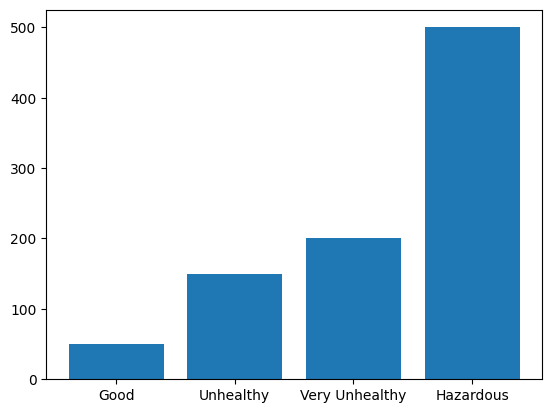

In [26]:
categories=['Good','Unhealthy','Very Unhealthy','Hazardous']
values= [50,150,200,500]
plt.bar(categories,values)
plt.show()